In [8]:
import os
import json
import requests
import datetime
from dotenv import load_dotenv
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# --- API 키 설정 ---
load_dotenv()

# [v17] 네이버 API 키 로드 (pdf_tools.py에서 이관)
NAVER_CLIENT_ID = os.getenv("NAVER_CLIENT_ID")
NAVER_CLIENT_SECRET = os.getenv("NAVER_CLIENT_SECRET")
if not NAVER_CLIENT_ID or not NAVER_CLIENT_SECRET:
    print("[trend_search] 경고: .env 파일에 NAVER_CLIENT_ID 또는 NAVER_CLIENT_SECRET이 없습니다.")
    print("    (네이버 실시간 트렌드 분석이 불가능합니다)")

In [2]:
def get_google_trends(keywords_list):
    """
    (v17) 키워드 리스트를 받아서, Google 트렌드 데이터를 딕셔너리로 반환합니다.
    (pytrends는 비공식 API라 429 에러가 발생할 수 있습니다.)
    """
    
    print(f"  [trend_search] 1. Google 트렌드 분석 시작: {keywords_list}")
    
    if not keywords_list:
        return {"error": "분석할 키워드가 없습니다."}
    
    
    try:
        pytrends = TrendReq(hl='ko-KR', tz=540)
        pytrends.build_payload(keywords_list[:5], cat=0, timeframe='today 12-m', geo='KR')
        
        related_queries_dict = pytrends.related_queries()
        
        related_queries_dict = {k.lower(): v for k, v in related_queries_dict.items()}

        top_related = {}
        for kw in keywords_list[:5]:
            normalized_kw = kw.lower()

            # 소문자로 변환된 키로 조회
            query_info = related_queries_dict.get(normalized_kw, {})

            # top 항목이 존재하는지 확인
            top_queries = query_info.get("top")
            if top_queries is not None and not top_queries.empty and "query" in top_queries.columns:
                top_related[kw] = top_queries["query"].head(5).tolist()
            else:
                top_related[kw] = []

        return {
            "analyzed_keywords": keywords_list[:5],
            "top_related_queries": top_related
        }

    except Exception as e:
        print(f" Google 트렌드 분석 중 오류 발생: {e}")
        return {"error": f"트렌드 분석 오류: {e}"}

# ----------------------------------------------------
# 기능 2: Naver 데이터랩 분석기 (검색량) (v15)
# ----------------------------------------------------
def get_naver_datalab_trend(keyword):

    
    """
    (v17) 네이버 데이터랩 API를 호출하여
    지난 3개월간의 '검색량 트렌드'를 JSON으로 반환합니다.
    """
    print(f"  [trend_search] 2. Naver 데이터랩 (검색량) 분석 시작: {keyword}")

    if not NAVER_CLIENT_ID or not NAVER_CLIENT_SECRET:
        return {"error": "네이버 API 키가 .env에 설정되지 않았습니다."}
    if not keyword:
        return {"error": "분석할 키워드가 없습니다."}

    url = "https://openapi.naver.com/v1/datalab/search"
    headers = {
        "X-Naver-Client-Id": NAVER_CLIENT_ID,
        "X-Naver-Client-Secret": NAVER_CLIENT_SECRET,
        "Content-Type": "application/json"
    }
    today = datetime.date.today()
    three_months_ago = today - datetime.timedelta(days=360)
    
    body = {
        "startDate": three_months_ago.strftime("%Y-%m-%d"),
        "endDate": today.strftime("%Y-%m-%d"),
        "timeUnit": "week",
        "keywordGroups": [{"groupName": keyword, "keywords": [keyword]}]
    }

    try:
        response = requests.post(url, headers=headers, data=json.dumps(body), timeout=500)
        response.raise_for_status()
        data = response.json()
        print(f"    - Naver 데이터랩 분석 완료.")
        return data
    except Exception as e:
        print(f" Naver 데이터랩 API 호출 중 오류 발생: {e}")
        return {"error": f"Naver API (DataLab) 오류: {e}"}


In [3]:
if __name__ == "__main__":
    keyword = '크리스마스'
    keywords_list = ['크리스마스', '산타', '겨울축제', '트리장식', '크리스마스이브']
    get_google_trends(keyword)
    get_naver_datalab_trend(keywords_list)

  [trend_search] 1. Google 트렌드 분석 시작: 크리스마스
 Google 트렌드 분석 중 오류 발생: The request failed: Google returned a response with code 429
  [trend_search] 2. Naver 데이터랩 (검색량) 분석 시작: ['크리스마스', '산타', '겨울축제', '트리장식', '크리스마스이브']
 Naver 데이터랩 API 호출 중 오류 발생: 400 Client Error: Bad Request for url: https://openapi.naver.com/v1/datalab/search


In [ ]:
NAVER_CLIENT_ID = os.getenv("NAVER_CLIENT_ID")
NAVER_CLIENT_SECRET = os.getenv("NAVER_CLIENT_SECRET")


================= TREND TEST v18 =================

[NaverDataLab] 분석 시작: ['크리스마스', '산타', '겨울축제', '트리장식', '크리스마스이브']
  ✔ Naver DataLab 분석 완료

[Naver DataLab 결과]
 <function get_naver_datalab at 0x000001D0D94B2340>


C:\Users\USER\AppData\Local\Temp\ipykernel_14952\3860043164.py:91: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_14952\3860043164.py:91: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_14952\3860043164.py:91: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_14952\3860043164.py:91: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_14952\3860043164.py:91: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_14952\3860043164.py:91: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from f

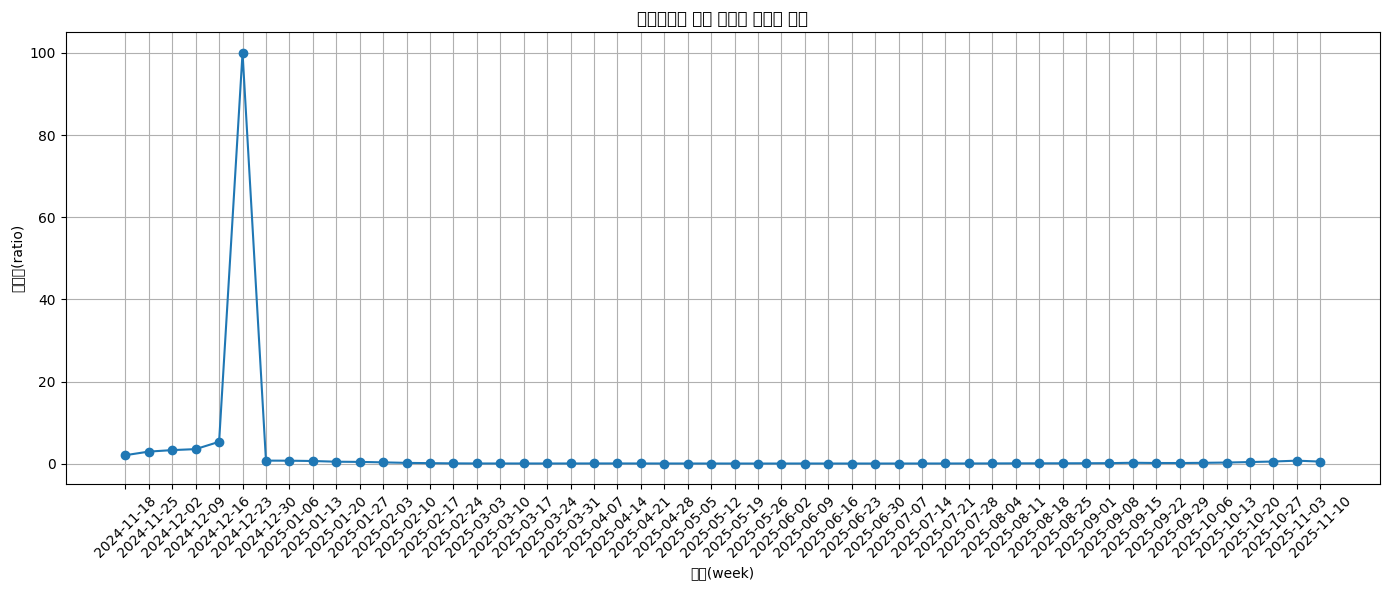

📊 그래프 생성 완료!


In [9]:
import time
import random
import json
import datetime
import requests
from pytrends.request import TrendReq

# ===================================================================
# 2) NAVER DATALAB (안정화)
# ===================================================================
def get_naver_datalab(keywords_list):
    print(f"\n[NaverDataLab] 분석 시작: {keywords_list}")


    url = "https://openapi.naver.com/v1/datalab/search"

    today = datetime.date.today()
    one_year_ago = today - datetime.timedelta(days=360)

    body = {
        "startDate": one_year_ago.strftime("%Y-%m-%d"),
        "endDate": today.strftime("%Y-%m-%d"),
        "timeUnit": "week",
        "keywordGroups": [
            {
                "groupName": "크리스마스",
                "keywords": keywords_list
            }
        ]
    }

    # ---------------------------------------------------
    # 핵심 포인트: UTF-8로 직접 인코딩해서 보내기
    # ---------------------------------------------------
    json_bytes = json.dumps(body, ensure_ascii=False).encode("utf-8")

    headers = {
        "X-Naver-Client-Id": NAVER_CLIENT_ID,
        "X-Naver-Client-Secret": NAVER_CLIENT_SECRET,
        "Content-Type": "application/json; charset=utf-8"
    }

    try:
        response = requests.post(
            url,
            headers=headers,
            data=json_bytes,   # 🔥 UTF-8 바이트 직접 전달
            timeout=10
        )

        # 한글 응답도 처리 가능하게 설정
        response.encoding = "utf-8"

        data = response.json()

        if "error" in data or "errorCode" in data:
            return {"error": f"Naver API 오류: {data}"}

        print("  ✔ Naver DataLab 분석 완료")
        return data

    except Exception as e:
        print(f"  ❗ Naver DataLab 오류: {e}")
        return {"error": f"Naver DataLab 오류: {e}"}
# ===================================================================
# 꺾은선 그래프 생성 함수
# ===================================================================
def plot_datalab_trend(data, title="검색량 트렌드"):
    """
    DataLab JSON에서 period, ratio만 추출해 line chart 생성
    """

    try:
        results = data["results"][0]["data"]  # 첫 번째 그룹의 주차별 데이터
    except:
        print("❗ 그래프를 그릴 수 있는 데이터가 없습니다.")
        return

    # period, ratio 리스트 추출
    periods = [item["period"] for item in results]
    ratios = [item["ratio"] for item in results]

    # 그래프 그리기
    plt.figure(figsize=(14, 6))
    plt.plot(periods, ratios, marker="o")
    plt.title(title)
    plt.xlabel("기간(week)")
    plt.ylabel("검색량(ratio)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

    print("📊 그래프 생성 완료!")
# ===================================================================
# 3) 통합 테스트용 함수
# ===================================================================
def test_trend_v18():
    print("\n================= TREND TEST v18 =================")
    keywords_list = ["크리스마스", "산타", "겨울축제", "트리장식", "크리스마스이브"]

    datalab_json = get_naver_datalab(keywords_list)
    # Naver DataLab
    print("\n[Naver DataLab 결과]\n", get_naver_datalab)

    plot_datalab_trend(datalab_json, title="크리스마스 관련 키워드 검색량 변화")


# 실행
if __name__ == "__main__":
    test_trend_v18()
